# CSCI 6515 - Assignment 1

In [238]:
import numpy as np 
import pandas as pd

# Data Pre-Processing 

In [239]:
PM_Dataset = pd.read_csv("Nova_Scotia_Provincial_Ambient_Fine_Particulate_Matter__PM2.5__Hourly_Data_Halifax_BAM_T640.csv", sep=",")
PM_Dataset

,Date & time,Pollutant,Unit,Station,Instrument,Average
0,01/25/2021 11:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,3.1
1,01/25/2021 11:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,3.4
2,01/25/2021 12:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,NaN
3,01/25/2021 12:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,3.3
4,01/26/2006 01:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
...,...,...,...,...,...,...
140250,12/31/2021 10:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,5.1
140251,12/31/2021 11:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,6.3
140252,12/31/2021 11:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,4.7
140253,12/31/2021 12:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,6.1


In [240]:
PM_Dataset.dtypes

Date & time     object
Pollutant       object
Unit            object
Station         object
Instrument      object
Average        float64
dtype: object

In [241]:
#Pre-processing the PM_Dataset for the records of year 2019
PM_Dataset['Date & time'] = pd.to_datetime(PM_Dataset['Date & time'])
PM_Dataset=PM_Dataset[PM_Dataset['Date & time'].dt.year.eq(2019)]
PM_Dataset['Date & time']=PM_Dataset['Date & time'].dt.strftime('%m/%d/%Y')
PM_Dataset = PM_Dataset.rename(columns={"Date & time" : "Date"})
PM_Dataset

C:\Users\User\AppData\Local\Temp/ipykernel_12088/3151908078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM_Dataset['Date & time']=PM_Dataset['Date & time'].dt.strftime('%m/%d/%Y')


,Date,Pollutant,Unit,Station,Instrument,Average
326,01/01/2019,PM2.5,µg/m3,Halifax Johnston,BAM 1020,10.0
327,01/01/2019,PM2.5,µg/m3,Halifax Johnston,BAM 1020,0.0
328,01/01/2019,PM2.5,µg/m3,Halifax Johnston,BAM 1020,8.0
329,01/01/2019,PM2.5,µg/m3,Halifax Johnston,BAM 1020,1.0
330,01/01/2019,PM2.5,µg/m3,Halifax Johnston,BAM 1020,5.0
...,...,...,...,...,...,...
140202,12/31/2019,PM2.5,µg/m3,Halifax Johnston,API T640,6.2
140203,12/31/2019,PM2.5,µg/m3,Halifax Johnston,API T640,7.1
140204,12/31/2019,PM2.5,µg/m3,Halifax Johnston,API T640,9.2
140205,12/31/2019,PM2.5,µg/m3,Halifax Johnston,API T640,6.8


In [242]:
PM_Dataset.drop(PM_Dataset.iloc[:, 1:5], inplace = True, axis = 1)
PM_Dataset

,Date,Average
326,01/01/2019,10.0
327,01/01/2019,0.0
328,01/01/2019,8.0
329,01/01/2019,1.0
330,01/01/2019,5.0
...,...,...
140202,12/31/2019,6.2
140203,12/31/2019,7.1
140204,12/31/2019,9.2
140205,12/31/2019,6.8


In [243]:
#Computing the average PM Level of each date 
PM_Dataset = PM_Dataset.groupby("Date").mean()
PM_Dataset

,Average
Date,
01/01/2019,3.083333
01/02/2019,2.625000
01/03/2019,5.625000
01/04/2019,5.136364
01/05/2019,8.208333
...,...
12/27/2019,5.295833
12/28/2019,4.850000
12/29/2019,3.712500


In [244]:
#Normalizing the Average 
PM_Dataset["Average"] = (PM_Dataset["Average"] - PM_Dataset["Average"].min()) / (PM_Dataset["Average"].max() - PM_Dataset["Average"].min()) 
PM_Dataset

,Average
Date,
01/01/2019,0.158172
01/02/2019,0.130555
01/03/2019,0.311323
01/04/2019,0.281880
01/05/2019,0.466985
...,...
12/27/2019,0.291489
12/28/2019,0.264625
12/29/2019,0.196083


In [245]:
PM_Dataset["PM_Level"] = np.where(PM_Dataset["Average"]>=0.3, "High", "Low")
PM_Dataset

,Average,PM_Level
Date,,
01/01/2019,0.158172,Low
01/02/2019,0.130555,Low
01/03/2019,0.311323,High
01/04/2019,0.281880,Low
01/05/2019,0.466985,High
...,...,...
12/27/2019,0.291489,Low
12/28/2019,0.264625,Low
12/29/2019,0.196083,Low


In [246]:
PM_Dataset['PM_Level'].value_counts()

Low     245
High    120
Name: PM_Level, dtype: int64

<AxesSubplot:xlabel='Date'>

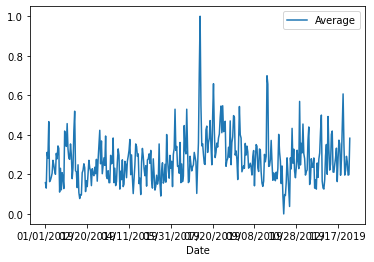

In [247]:
PM_Dataset[["Average"]].plot()

In [248]:
Traffic_Dataset = pd.read_csv("Traffic_Volumes_-_Provincial_Highway_System.csv", sep = ",")
Traffic_Dataset

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2733.00,2550.0,NaN,NaN,NaN
1,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,4.0,1774.00,1350.0,W,NaN,NaN
2,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,4.0,1396.00,1310.0,E,NaN,NaN
3,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2350.00,2460.0,NaN,NaN,NaN
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.00,2430.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/17/2015,0.25 KM NORTH OF HWY 103 INTER/C (NB),C,VC,QUE,6.0,1854.00,1590.0,N,NaN,NaN
9546,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,07/19/2012,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,NaN,5216.00,4070.0,NaN,NaN,NaN
9547,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,08/19/2009,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,NaN,4607.00,3380.0,NaN,NaN,NaN
9548,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/21/2006,0.25 KM NORTH OF HWY 103 INTER/C (SB),C,VC,QUE,5.0,1897.14,1690.0,S,NaN,NaN


In [249]:
print(Traffic_Dataset.dtypes)

SECTION ID               int64
HIGHWAY                  int64
SECTION                  int64
SECTION LENGTH         float64
SECTION DESCRIPTION     object
Date                    object
DESCRIPTION             object
GROUP                   object
TYPE                    object
COUNTY                  object
PTRUCKS                float64
ADT                    float64
AADT                   float64
DIRECTION               object
85PCT                  float64
PRIORITY_POINTS        float64
dtype: object


In [250]:
Traffic_Dataset["Date"] = pd.to_datetime(Traffic_Dataset["Date"])
print(Traffic_Dataset.dtypes)

SECTION ID                      int64
HIGHWAY                         int64
SECTION                         int64
SECTION LENGTH                float64
SECTION DESCRIPTION            object
Date                   datetime64[ns]
DESCRIPTION                    object
GROUP                          object
TYPE                           object
COUNTY                         object
PTRUCKS                       float64
ADT                           float64
AADT                          float64
DIRECTION                      object
85PCT                         float64
PRIORITY_POINTS               float64
dtype: object


In [251]:
#Pre-processing the Data for the records of Halifax Region 
Traffic_Dataset= Traffic_Dataset[Traffic_Dataset["COUNTY"].eq("HFX")]
Traffic_Dataset

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,2021-05-27,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2733.0,2550.0,NaN,NaN,NaN
1,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,2021-05-27,JUST WEST OF PATTON RD (WB),A,VC,HFX,4.0,1774.0,1350.0,W,NaN,NaN
2,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,2021-05-27,JUST WEST OF PATTON RD (EB),A,VC,HFX,4.0,1396.0,1310.0,E,NaN,NaN
3,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,2020-11-24,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2350.0,2460.0,NaN,NaN,NaN
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,2019-09-09,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.0,2430.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9344,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,2009-10-20,1 KM EAST OF NAUGLERS SETTLEMENT RD,D,TC,HFX,NaN,537.0,550.0,NaN,NaN,NaN
9345,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,2007-06-20,AT CIVIC # 28520 (MOSER RIVER) WESTBOUND,D,VC,HFX,7.0,389.0,340.0,W,92.0,NaN
9346,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,2007-06-20,AT CIVIC # 28520 (MOSER RIVER) EASTBOUND,D,VC,HFX,16.0,386.0,340.0,E,90.0,NaN
9347,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,2006-10-17,AT CIVIC # 28520 (MOSER RIVER),D,TC,HFX,NaN,719.0,680.0,NaN,NaN,NaN


In [252]:
#Filtering out the traffic data of year 2019 
Traffic_Dataset=Traffic_Dataset[Traffic_Dataset['Date'].dt.year.eq(2019)]
Traffic_Dataset['Date']=Traffic_Dataset['Date'].dt.strftime('%m/%d/%Y')
Traffic_Dataset

C:\Users\User\AppData\Local\Temp/ipykernel_12088/635188865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Traffic_Dataset['Date']=Traffic_Dataset['Date'].dt.strftime('%m/%d/%Y')


,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.0,2430.0,NaN,NaN,NaN
554,101020,101,20,3.71,TK 1 OVERPASS (LOWER SACKVILLE) TO EXIT 2 (RTE...,09/12/2019,1.4 KM WEST OF TK 1 (EB) (LOOPS),A,TC,HFX,NaN,23205.0,22000.0,E,NaN,NaN
555,101020,101,20,3.71,TK 1 OVERPASS (LOWER SACKVILLE) TO EXIT 2 (RTE...,09/12/2019,1.4 KM WEST OF TK 1 (WB) (LOOPS),A,TC,HFX,NaN,23385.0,22100.0,W,NaN,NaN
584,101025,101,25,2.89,EXIT 2 (RTE 354 INTER/C) TO EXIT 2A (MARGESON ...,09/12/2019,2.04 KM WEST OF EXIT 2 (WB) (LOOPS),A,TC,HFX,NaN,16023.0,15200.0,W,NaN,NaN
585,101025,101,25,2.89,EXIT 2 (RTE 354 INTER/C) TO EXIT 2A (MARGESON ...,09/12/2019,1.02 KM EAST OF EXIT 2A (EB) (LOOPS),A,TC,HFX,NaN,16204.0,15300.0,E,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,7060,7,60,3.60,RTE 224 (SHEET HARBOUR) TO RTE 374,06/13/2019,2.5 KM EAST OF RTE 224,B,TC,HFX,NaN,2962.0,2760.0,NaN,NaN,NaN
9304,7062,7,62,11.99,RTE 374 TO PORT DUFFERIN BRIDGE (SALMON RIVER),06/13/2019,5 KM EAST OF RTE 374,D,TC,HFX,NaN,1176.0,1100.0,NaN,NaN,NaN
9320,7064,7,64,14.46,PORT DUFFERIN BRIDGE (SALMON RIVER) TO MOOSEHE...,06/13/2019,3 KM EAST OF SMITH POINT RD,D,TC,HFX,NaN,784.0,730.0,NaN,NaN,NaN
9334,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,06/13/2019,1 KM EAST OF NAUGLERS SETTLEMENT RD (EB),D,VC,HFX,4.0,321.0,300.0,E,NaN,NaN


In [409]:
Combined_dataset = pd.merge(Traffic_Dataset, PM_Dataset, on = "Date", how = "left")
Combined_dataset

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS,Average,PM_Level
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.0,2430.0,NaN,NaN,NaN,0.271403,Low
1,101020,101,20,3.71,TK 1 OVERPASS (LOWER SACKVILLE) TO EXIT 2 (RTE...,09/12/2019,1.4 KM WEST OF TK 1 (EB) (LOOPS),A,TC,HFX,NaN,23205.0,22000.0,E,NaN,NaN,0.232488,Low
2,101020,101,20,3.71,TK 1 OVERPASS (LOWER SACKVILLE) TO EXIT 2 (RTE...,09/12/2019,1.4 KM WEST OF TK 1 (WB) (LOOPS),A,TC,HFX,NaN,23385.0,22100.0,W,NaN,NaN,0.232488,Low
3,101025,101,25,2.89,EXIT 2 (RTE 354 INTER/C) TO EXIT 2A (MARGESON ...,09/12/2019,2.04 KM WEST OF EXIT 2 (WB) (LOOPS),A,TC,HFX,NaN,16023.0,15200.0,W,NaN,NaN,0.232488,Low
4,101025,101,25,2.89,EXIT 2 (RTE 354 INTER/C) TO EXIT 2A (MARGESON ...,09/12/2019,1.02 KM EAST OF EXIT 2A (EB) (LOOPS),A,TC,HFX,NaN,16204.0,15300.0,E,NaN,NaN,0.232488,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7060,7,60,3.60,RTE 224 (SHEET HARBOUR) TO RTE 374,06/13/2019,2.5 KM EAST OF RTE 224,B,TC,HFX,NaN,2962.0,2760.0,NaN,NaN,NaN,0.252704,Low
164,7062,7,62,11.99,RTE 374 TO PORT DUFFERIN BRIDGE (SALMON RIVER),06/13/2019,5 KM EAST OF RTE 374,D,TC,HFX,NaN,1176.0,1100.0,NaN,NaN,NaN,0.252704,Low
165,7064,7,64,14.46,PORT DUFFERIN BRIDGE (SALMON RIVER) TO MOOSEHE...,06/13/2019,3 KM EAST OF SMITH POINT RD,D,TC,HFX,NaN,784.0,730.0,NaN,NaN,NaN,0.252704,Low
166,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,06/13/2019,1 KM EAST OF NAUGLERS SETTLEMENT RD (EB),D,VC,HFX,4.0,321.0,300.0,E,NaN,NaN,0.252704,Low


In [410]:
Combined_dataset['PM_Level'].value_counts()

Low     132
High     36
Name: PM_Level, dtype: int64

<AxesSubplot:>

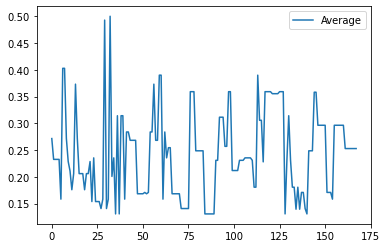

In [411]:
Combined_dataset[["Average"]].plot()

In [412]:
Combined_dataset = Combined_dataset[["HIGHWAY", "SECTION" , "SECTION LENGTH", "Date", "ADT", "AADT", "Average", "PM_Level"]]
Combined_dataset

,HIGHWAY,SECTION,SECTION LENGTH,Date,ADT,AADT,Average,PM_Level
0,1,47,4.50,09/09/2019,2566.0,2430.0,0.271403,Low
1,101,20,3.71,09/12/2019,23205.0,22000.0,0.232488,Low
2,101,20,3.71,09/12/2019,23385.0,22100.0,0.232488,Low
3,101,25,2.89,09/12/2019,16023.0,15200.0,0.232488,Low
4,101,25,2.89,09/12/2019,16204.0,15300.0,0.232488,Low
...,...,...,...,...,...,...,...,...
163,7,60,3.60,06/13/2019,2962.0,2760.0,0.252704,Low
164,7,62,11.99,06/13/2019,1176.0,1100.0,0.252704,Low
165,7,64,14.46,06/13/2019,784.0,730.0,0.252704,Low
166,7,66,11.77,06/13/2019,321.0,300.0,0.252704,Low


In [413]:
Combined_dataset = Combined_dataset.drop(["Date"], axis = 1)
Combined_dataset

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average,PM_Level
0,1,47,4.50,2566.0,2430.0,0.271403,Low
1,101,20,3.71,23205.0,22000.0,0.232488,Low
2,101,20,3.71,23385.0,22100.0,0.232488,Low
3,101,25,2.89,16023.0,15200.0,0.232488,Low
4,101,25,2.89,16204.0,15300.0,0.232488,Low
...,...,...,...,...,...,...,...
163,7,60,3.60,2962.0,2760.0,0.252704,Low
164,7,62,11.99,1176.0,1100.0,0.252704,Low
165,7,64,14.46,784.0,730.0,0.252704,Low
166,7,66,11.77,321.0,300.0,0.252704,Low


In [414]:
Plot_data = Combined_dataset
Plot_data["Color"] = Combined_dataset["PM_Level"].map({"Low": "Green", "High": "Red"})   

<AxesSubplot:xlabel='AADT', ylabel='Average'>

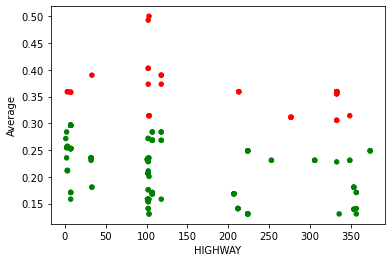

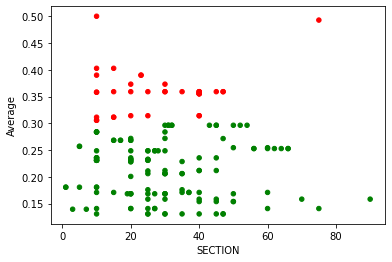

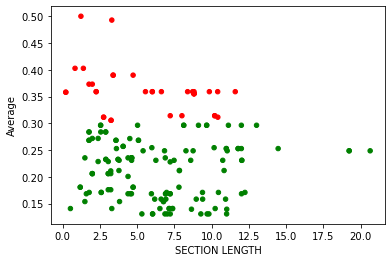

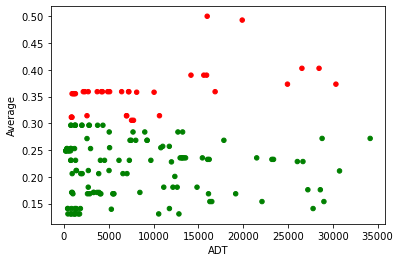

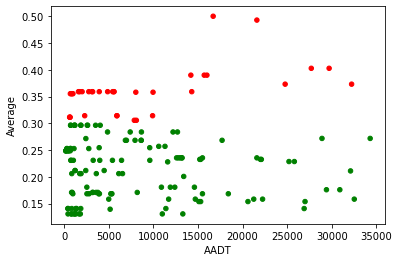

In [415]:
Combined_dataset.plot.scatter(x='HIGHWAY', y='Average', c='Color')
Combined_dataset.plot.scatter(x='SECTION', y='Average', c='Color')
Combined_dataset.plot.scatter(x='SECTION LENGTH', y='Average', c='Color')
Combined_dataset.plot.scatter(x='ADT', y='Average', c='Color')
Combined_dataset.plot.scatter(x='AADT', y='Average', c='Color')

# Model Evaluation

In [416]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder 

In [417]:
le_PM_Level = LabelEncoder()

In [418]:
Combined_dataset["label"] = le_PM_Level.fit_transform(Combined_dataset["PM_Level"])
label_encoder_mapping = dict(zip(le_PM_Level.classes_, le_PM_Level.transform(le_PM_Level.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_mapping, sep="\n")

Mapping of Label Encoded Classes
{'High': 0, 'Low': 1}


In [419]:
Combined_dataset = Combined_dataset.drop(["Color", "Average", "PM_Level"], axis = 1)
Combined_dataset

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,label
0,1,47,4.50,2566.0,2430.0,1
1,101,20,3.71,23205.0,22000.0,1
2,101,20,3.71,23385.0,22100.0,1
3,101,25,2.89,16023.0,15200.0,1
4,101,25,2.89,16204.0,15300.0,1
...,...,...,...,...,...,...
163,7,60,3.60,2962.0,2760.0,1
164,7,62,11.99,1176.0,1100.0,1
165,7,64,14.46,784.0,730.0,1
166,7,66,11.77,321.0,300.0,1


In [518]:
Combined_dataset['label'].value_counts()

1    132
0     36
Name: label, dtype: int64

In [420]:
Combined_dataset.isnull().sum()

HIGHWAY           0
SECTION           0
SECTION LENGTH    0
ADT               6
AADT              0
label             0
dtype: int64

In [421]:
Combined_dataset = Combined_dataset.reset_index(drop=True)

In [422]:
Combined_dataset = Combined_dataset.fillna(method ='pad')

In [423]:
Combined_dataset.isnull().sum()

HIGHWAY           0
SECTION           0
SECTION LENGTH    0
ADT               0
AADT              0
label             0
dtype: int64

In [424]:
feature_cols = ["HIGHWAY", "SECTION", "SECTION LENGTH", "ADT", "AADT"]
X = Combined_dataset[feature_cols]
Y = Combined_dataset.iloc[:,-1]
#X = Combined_dataset[:-1]
#y = Combined_dataset["label"]

In [425]:
#Apportioning the dataset into training and testing dataset with 50-50 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [426]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
163    1
164    1
165    1
166    1
167    1
Name: label, Length: 168, dtype: int32


In [427]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_train, y_train)

In [428]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [429]:
y_trainpred = clf.predict(X_train)

In [430]:
y_testpred = clf.predict(X_test)

In [431]:
from sklearn import metrics

In [432]:
#Acuracy of Training
print("Training Accuracy: ",metrics.accuracy_score(y_train, y_trainpred)*100)

Training Accuracy:  100.0


In [433]:
#Acuracy of Testing 
print("Testing Accuracy: ",metrics.accuracy_score(y_test, y_testpred)*100)

Testing Accuracy:  77.38095238095238


In [434]:
print("Training Confusion Matrix: \n", confusion_matrix(y_train, y_trainpred))

Training Confusion Matrix: 
 [[20  0]
 [ 0 64]]


In [435]:
print("Testing Confusion Matrix: \n", confusion_matrix(y_test, y_testpred))

Testing Confusion Matrix: 
 [[ 7  9]
 [10 58]]


In [458]:
#Classification Report of Training 
print(classification_report(y_train, y_trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        64

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [436]:
#Classification Report of Testing 
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42        16
           1       0.87      0.85      0.86        68

    accuracy                           0.77        84
   macro avg       0.64      0.65      0.64        84
weighted avg       0.78      0.77      0.78        84



In [437]:
clf.feature_importances_ 

array([0.23026643, 0.17181804, 0.24051069, 0.29202947, 0.06537538])

In [438]:
feature_names = X.columns
Feature_importance = pd.DataFrame((clf.feature_importances_), index = X.columns).sort_values(0, ascending=False)
Feature_importance

,0
ADT,0.292029
SECTION LENGTH,0.240511
HIGHWAY,0.230266
SECTION,0.171818
AADT,0.065375


<AxesSubplot:>

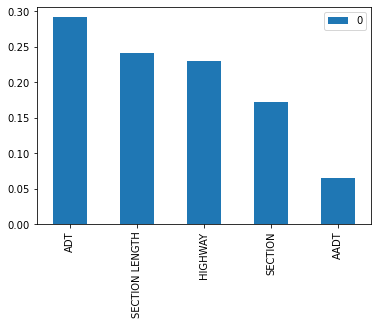

In [439]:
Feature_importance.plot(kind="bar")

[Text(513.9473684210526, 1540.2, 'ADT <= 2177.0\nentropy = 0.792\nsamples = 84\nvalue = [20, 64]\nclass = Low'),
 Text(146.8421052631579, 1359.0, 'HIGHWAY <= 293.0\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]\nclass = Low'),
 Text(73.42105263157895, 1177.8, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = Low'),
 Text(220.26315789473682, 1177.8, 'SECTION <= 34.0\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = Low'),
 Text(146.8421052631579, 996.6, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Low'),
 Text(293.6842105263158, 996.6, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = High'),
 Text(881.0526315789473, 1359.0, 'HIGHWAY <= 210.0\nentropy = 0.918\nsamples = 57\nvalue = [19, 38]\nclass = Low'),
 Text(513.9473684210526, 1177.8, 'SECTION LENGTH <= 1.432\nentropy = 0.74\nsamples = 43\nvalue = [9, 34]\nclass = Low'),
 Text(440.52631578947364, 996.6, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = High'),
 Text(587.3684210526316, 996.6, 'SECTION LENGTH 

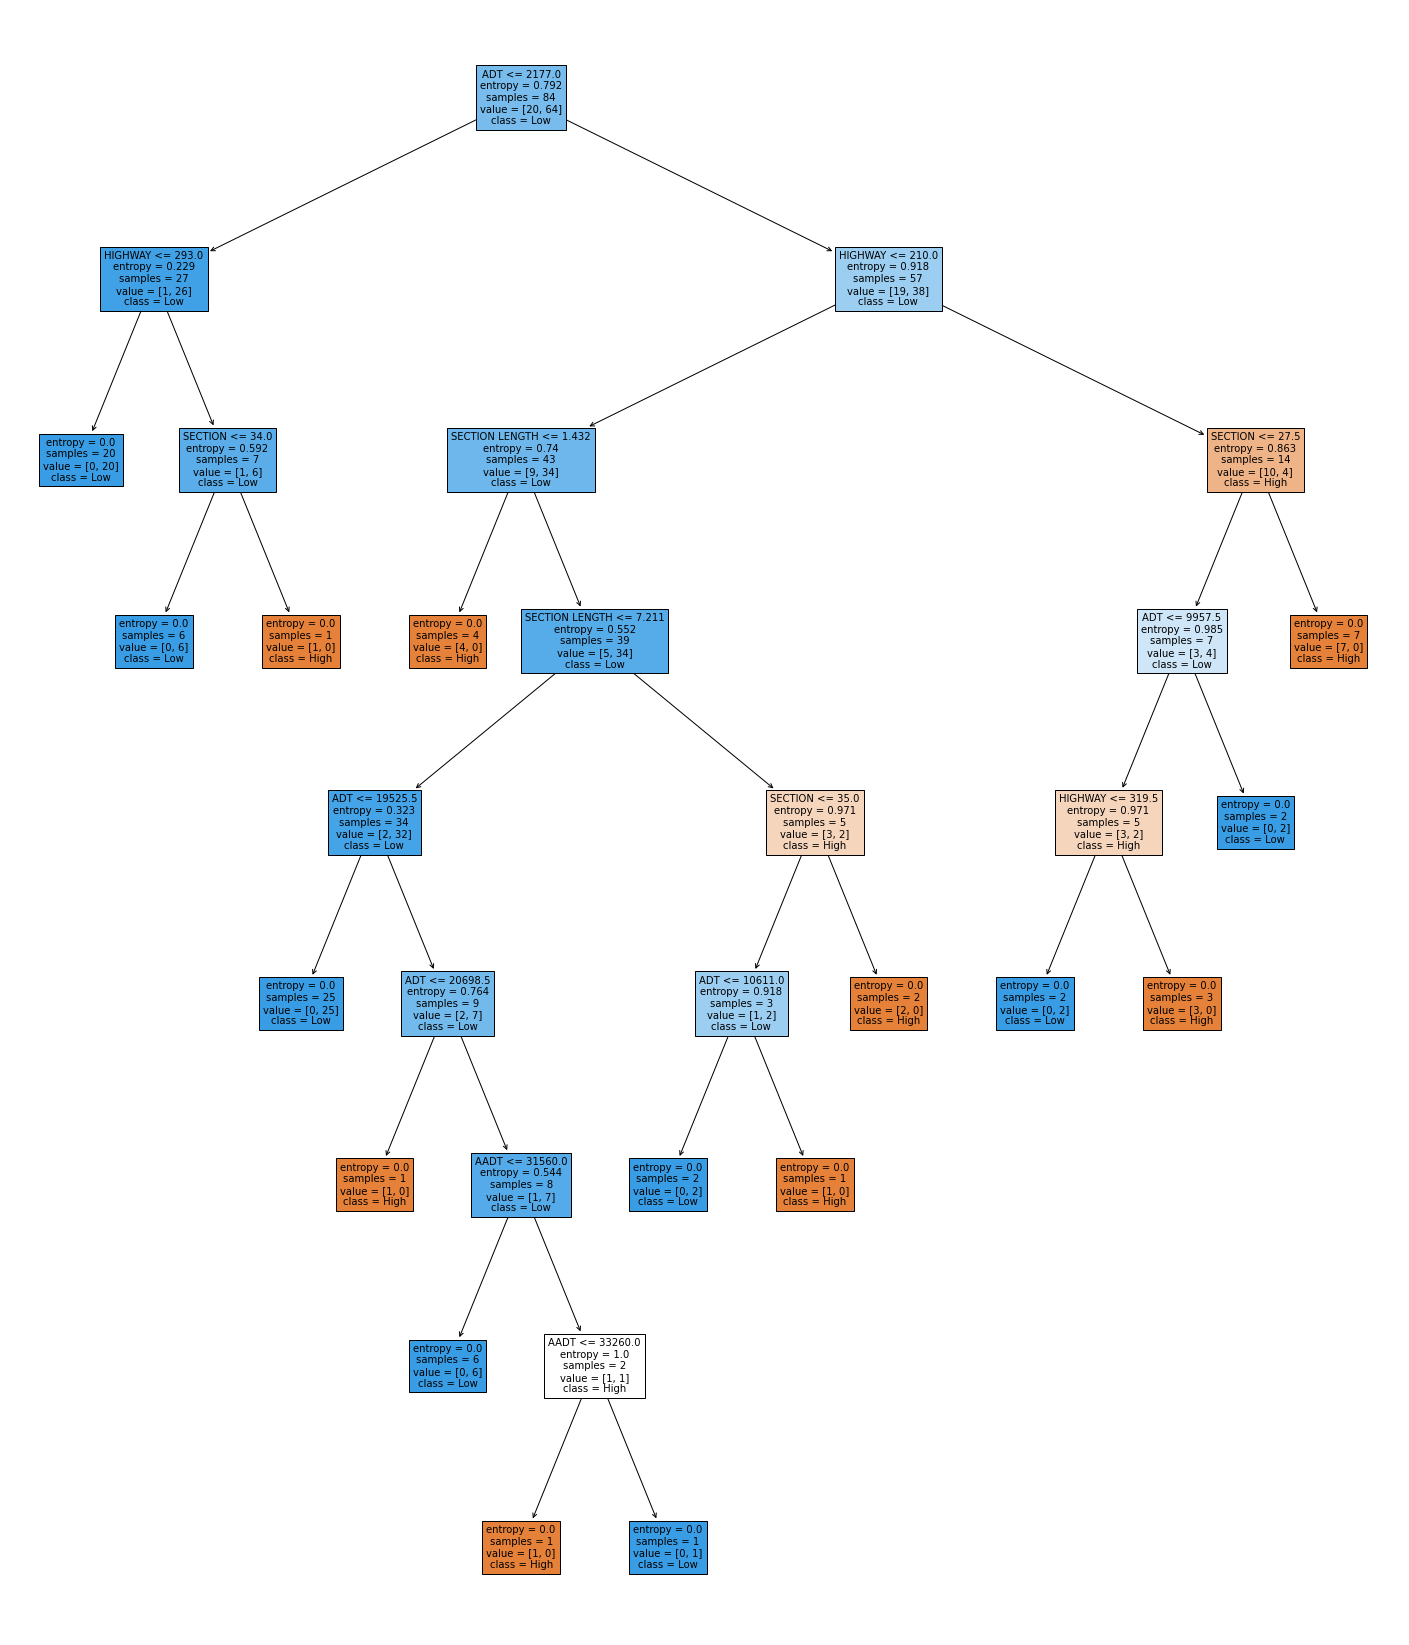

In [440]:
from sklearn import tree 
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(25,30))
tree.plot_tree(clf, feature_names = feature_names, class_names = {0: "High", 1: "Low"}, filled = True)

In [441]:
Combined_dataset

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,label
0,1,47,4.50,2566.0,2430.0,1
1,101,20,3.71,23205.0,22000.0,1
2,101,20,3.71,23385.0,22100.0,1
3,101,25,2.89,16023.0,15200.0,1
4,101,25,2.89,16204.0,15300.0,1
...,...,...,...,...,...,...
163,7,60,3.60,2962.0,2760.0,1
164,7,62,11.99,1176.0,1100.0,1
165,7,64,14.46,784.0,730.0,1
166,7,66,11.77,321.0,300.0,1


In [442]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [443]:
model = DecisionTreeClassifier()

In [444]:
kf = KFold(n_splits=10)

In [445]:
scores = cross_val_score(model, X, y, cv = kf)
scores

array([0.82352941, 0.88235294, 0.82352941, 0.64705882, 0.82352941,
       0.70588235, 0.70588235, 0.76470588, 0.875     , 1.        ])

In [446]:
print("Accuracy:", np.mean(scores)*100, "\n Standard Deviation:", np.std(scores))

Accuracy: 80.51470588235293 
 Standard Deviation: 0.09805912787983395


In [448]:
conf_mat = []
i = 1
for train_index, test_index in kf.split(X):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    model = clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    conf_matrix = confusion_matrix(ytest, ypred)
    conf_mat.append(conf_matrix)
    print("Fold", i)
    print(classification_report(ytest, ypred))
    print("-------------------------------------------------------")
    i += 1

Fold 1
              precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       0.88      0.50      0.64        14

    accuracy                           0.53        17
   macro avg       0.55      0.58      0.48        17
weighted avg       0.76      0.53      0.58        17

-------------------------------------------------------
Fold 2
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.93      0.93      0.93        15

    accuracy                           0.88        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.88      0.88      0.88        17

-------------------------------------------------------
Fold 3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      1.00      0.90        14

    accuracy                           0.82      

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

In [449]:
from sklearn.model_selection import cross_validate
_scoring = ['precision', 'recall', 'f1']
results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=10,
                               scoring=_scoring,
                               )
      
pre_avg = results['test_precision'].mean()
re_avg = results['test_recall'].mean()
F1_avg = results['test_f1'].mean()
print("The average Precision is:", pre_avg)
print("The average Recall is:", re_avg)
print("The average F1 score is:", F1_avg)

The average Precision is: 0.8388103318250376
The average Recall is: 0.6582417582417583
The average F1 score is: 0.6910952755831052


In [450]:
average_conf = np.mean(conf_mat)
average_conf

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


array([[ 3,  3],
       [ 3, 11]], dtype=int64)

# Experiments with max_depth, min_samples_split and min_samples_leaf

In [523]:
i = 1
for depth in [2,4,6,8,10]:
    tree = DecisionTreeClassifier(max_depth = depth)
    tree.fit(X_train,y_train)
    
    #y_exp_trainpred = tree.predict(X_train)
    y_exp_testpred = tree.predict(X_test)

    print("Classification Report", i)
    print(classification_report(y_test, y_exp_testpred))
    
    i += 1
    

Classification Report 1
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        16
           1       0.82      0.93      0.87        68

    accuracy                           0.77        84
   macro avg       0.55      0.53      0.52        84
weighted avg       0.72      0.77      0.74        84

Classification Report 2
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        16
           1       0.88      0.82      0.85        68

    accuracy                           0.76        84
   macro avg       0.64      0.66      0.65        84
weighted avg       0.78      0.76      0.77        84

Classification Report 3
              precision    recall  f1-score   support

           0       0.37      0.44      0.40        16
           1       0.86      0.82      0.84        68

    accuracy                           0.75        84
   macro avg       0.61      0.63      0.62        84
we

In [524]:
i = 1
for values in [5,15,25,35,45]:
    tree1 = DecisionTreeClassifier(min_samples_split = values)
    tree1.fit(X_train,y_train)
    
    #y_exp_trainpred1 = tree1.predict(X_train)
    y_exp_testpred1 = tree1.predict(X_test)

    print("Classification Report", i)
    print(classification_report(y_test, y_exp_testpred1))
    
    i += 1

Classification Report 1
              precision    recall  f1-score   support

           0       0.46      0.38      0.41        16
           1       0.86      0.90      0.88        68

    accuracy                           0.80        84
   macro avg       0.66      0.64      0.65        84
weighted avg       0.78      0.80      0.79        84

Classification Report 2
              precision    recall  f1-score   support

           0       0.20      0.25      0.22        16
           1       0.81      0.76      0.79        68

    accuracy                           0.67        84
   macro avg       0.51      0.51      0.51        84
weighted avg       0.70      0.67      0.68        84

Classification Report 3
              precision    recall  f1-score   support

           0       0.20      0.25      0.22        16
           1       0.81      0.76      0.79        68

    accuracy                           0.67        84
   macro avg       0.51      0.51      0.51        84
we

In [525]:
i = 1
for values in [5,15,25,35,45]:
    tree2 = DecisionTreeClassifier(min_samples_leaf = values)
    tree2.fit(X_train,y_train)
    
    #y_exp_trainpred2 = tree2.predict(X_train)
    y_exp_testpred2 = tree2.predict(X_test)

    print("Classification Report", i)
    print(classification_report(y_test, y_exp_testpred2))
    
    i += 1

Classification Report 1
              precision    recall  f1-score   support

           0       0.23      0.19      0.21        16
           1       0.82      0.85      0.83        68

    accuracy                           0.73        84
   macro avg       0.52      0.52      0.52        84
weighted avg       0.71      0.73      0.71        84

Classification Report 2
              precision    recall  f1-score   support

           0       0.25      0.12      0.17        16
           1       0.82      0.91      0.86        68

    accuracy                           0.76        84
   macro avg       0.53      0.52      0.51        84
weighted avg       0.71      0.76      0.73        84

Classification Report 3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.81      1.00      0.89        68

    accuracy                           0.81        84
   macro avg       0.40      0.50      0.45        84
we

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\